In [1]:
# %load train_cnn_imitate_5.py
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,GRU,Reshape,Bidirectional
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import os
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import csv

LETTERSTR = "0123456789ABCDEFGHJKLMNPQRSTUVWXYZ "

def toonehot(text):
    labellist = []
    for letter in text:
        onehot = [0 for _ in range(35)]
        num = LETTERSTR.find(letter)
        onehot[num] = 1
        labellist.append(onehot)
    return labellist


def decodeonhot(output):
    answer=[]
    for ans in output:
        max_probility=ans.argmax(axis=1).tolist()
        answer.append(LETTERSTR[max_probility[0]])
    return answer
        

Using TensorFlow backend.


# 讀檔測試

In [2]:
pic_file="./data/realdata/"+"0001"+".jpg" #NUM_OF_PICTURE
model = load_model('./data/model/imitate_56_model_1.h5') 
train_data = np.stack([np.array(Image.open(pic_file))/255.0 ])

# 測試模型

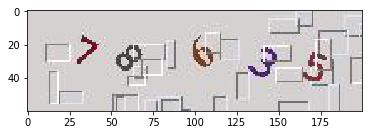

The ansewr is ： 78635 


In [4]:
prediction=model.predict(train_data)
img = Image.open(os.path.join(pic_file))
plt.imshow(img)
plt.show()
ans=decodeonhot(prediction)
print("The ansewr is ：",''.join(ans))